In [1]:
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from matplotlib.collections import LineCollection
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
shp = ps.open(ps.examples.get_path("taz.shp"))

In [3]:
dbf = ps.open(ps.examples.get_path("taz.dbf"))
              

In [4]:
dbf.header

['AREA',
 'PERIMETER',
 'CNTY',
 'RSA',
 'AIRDB',
 'TAZ2K',
 'SQ_MILE',
 'ACRE',
 'NEWSEQ',
 'CSA',
 'CSA_NEW',
 'SQMI_TAZ',
 'TAZ_NUM',
 'CountyFIPS']

/Users/serge/anaconda/envs/pysal110/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


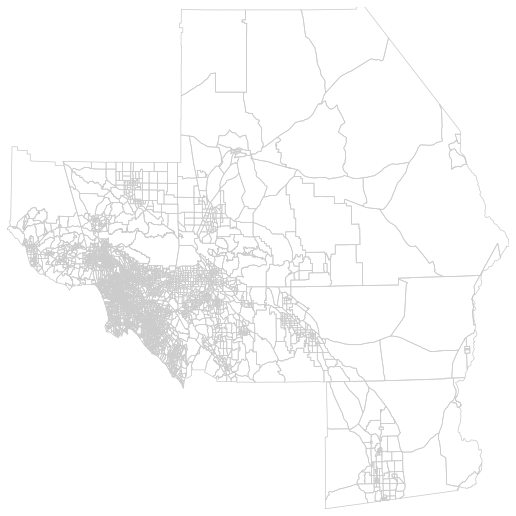

In [5]:
fig = figure(figsize=(9,9))
base = maps.map_poly_shp(shp)
base.set_linewidth(0.75)
base.set_facecolor('none')
base.set_edgecolor('0.8')
ax = maps.setup_ax([base])
fig.add_axes(ax)
show()

## County as unique values

In [6]:
cnty = np.array(dbf.by_col("CNTY"))

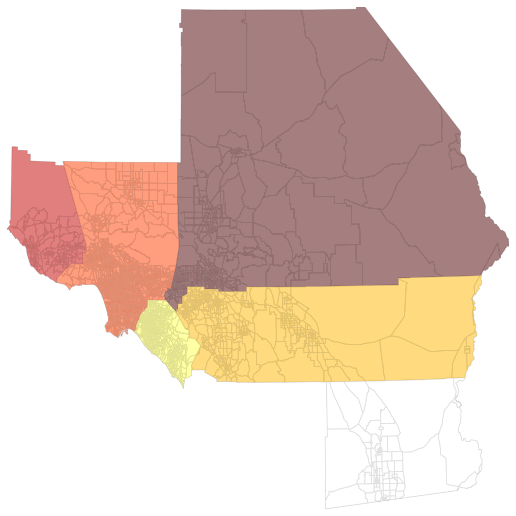

In [7]:

fig = figure(figsize=(9,9))
base = maps.map_poly_shp(shp)
base.set_linewidth(0.75)
base.set_facecolor('none')
base.set_edgecolor('0.8')
counties = maps.base_choropleth_unique(maps.map_poly_shp(shp), cnty)
counties.set_linewidth(0)
counties.set_alpha(.5)
ax = maps.setup_ax([base, counties])
fig.add_axes(ax)
show()


In [8]:
cents = np.array([poly.centroid for poly in shp])
cents[0]

array([  601741.78690918,  3939798.30153461])

In [9]:
wrook = ps.rook_from_shapefile(ps.examples.get_path("taz.shp"))

In [10]:
w = wrook


In [11]:
cents.min(axis=0)

array([  282150.8269443 ,  3615409.10372805])

In [12]:
def w2line_graph(w, centroids):
        
    segments = []
    for i in w.id2i:
        origin = cents[i]
        for j in w.neighbors[i]:
            dest = cents[j]
            ij = [i,j]
            ij.sort()
            segments.append([origin, dest])

    return segments    

        

In [13]:
segs = w2line_graph(wrook, cents)

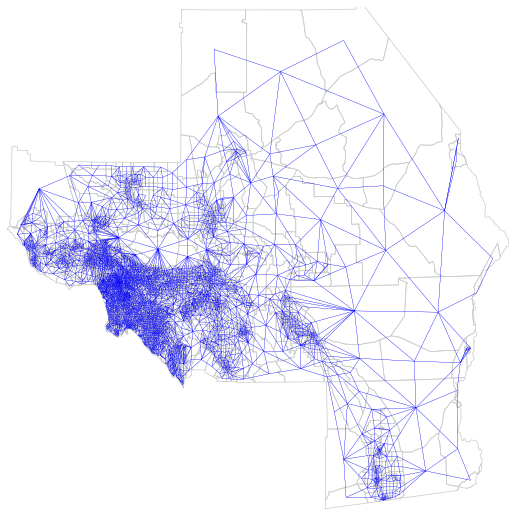

In [14]:
fig = figure(figsize=(9,9))
base = maps.map_poly_shp(shp)
base.set_linewidth(0.75)
base.set_facecolor('none')
base.set_edgecolor('0.8')
segs = LineCollection(segs)
maps._add_axes2col(segs, shp.bbox)
segs.set_linewidth(0.20)
ax = maps.setup_ax([base, segs])
fig.add_axes(ax)
show()


## Intersection weights

In [15]:
wb = ps.regime_weights(np.array(dbf.by_col("CNTY")))

In [16]:
wb.n

4109

In [17]:
wint = ps.weights.Wsets.w_intersection(wb, wrook)

In [18]:
segs = w2line_graph(wint, cents)

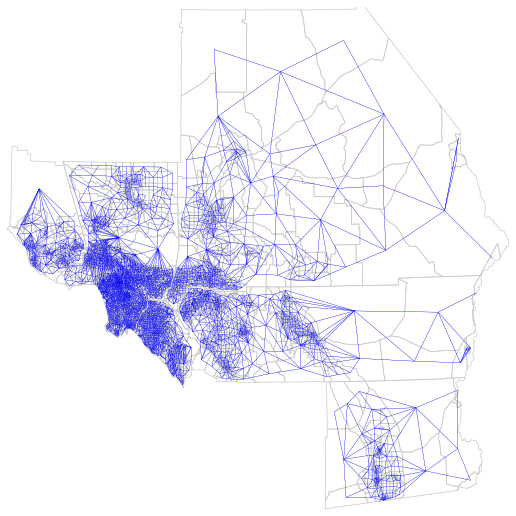

In [19]:
fig = figure(figsize=(9,9))
base = maps.map_poly_shp(shp)
base.set_linewidth(0.75)
base.set_facecolor('none')
base.set_edgecolor('0.8')
segs = LineCollection(segs)
maps._add_axes2col(segs, shp.bbox)
segs.set_linewidth(0.20)
ax = maps.setup_ax([base, segs])
fig.add_axes(ax)
show()


In [20]:
segments = w2line_graph(wint, cents)

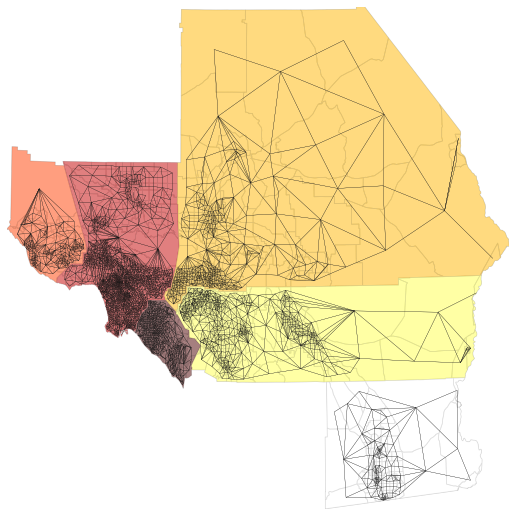

In [21]:
fig = figure(figsize=(9,9))
base = maps.map_poly_shp(shp)
base.set_linewidth(0.75)
base.set_facecolor('none')
base.set_edgecolor('0.8')
counties = maps.base_choropleth_unique(maps.map_poly_shp(shp), cnty)
counties.set_linewidth(0)
counties.set_alpha(.5)
segs = LineCollection(segments)
maps._add_axes2col(segs, shp.bbox)
segs.set_linewidth(0.20)
segs.set_color('0.1')
ax = maps.setup_ax([base, counties, segs])
fig.add_axes(ax)
show()
